In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv('C:/Users/HP/Py Code/ML/Data/place.csv')

# EDA

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [8]:
df.corr()

,cgpa,iq,placement
cgpa,1.000000,-0.098791,0.821688
iq,-0.098791,1.000000,-0.083031
placement,0.821688,-0.083031,1.000000


In [9]:
df.cov()

,cgpa,iq,placement
cgpa,1.307898,-4.512909,0.472222
iq,-4.512909,1595.538990,-1.666667
placement,0.472222,-1.666667,0.252525


In [10]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


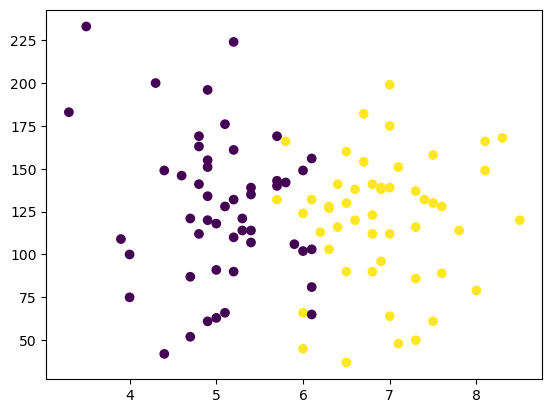

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# Extract input and output columns

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]


# Train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

# Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Model

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_scaled,y_train)

y_pred = clf.predict(X_test_scaled)

# Accuracy measures

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



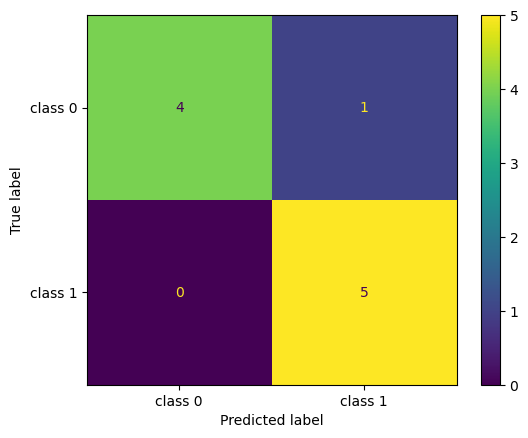

In [19]:
from sklearn.metrics import classification_report
from sklearn import metrics
c1=classification_report(y_test, y_pred)
print(c1)


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class 0','class 1'])
cm_display.plot()
plt.show() 

# Decision boundary

<AxesSubplot:>

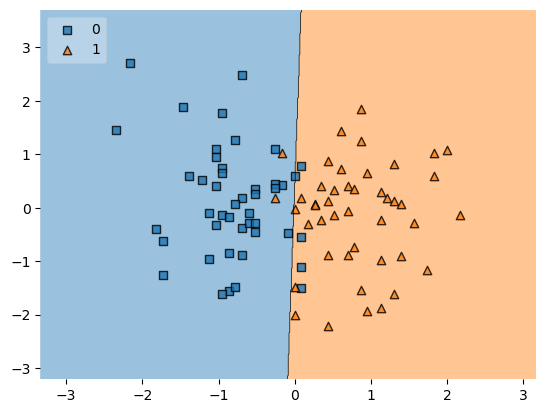

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_scaled, y_train.values, clf=clf, legend=2)

In [82]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))